In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
from scipy import stats
from scipy.stats import skew, kurtosis
warnings.filterwarnings('ignore')
%matplotlib inline

if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('dataset2.csv').copy()

In [3]:
data

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부,BMI
0,1,8,170,75,90.00000,1.00000,1.00000,1.00000,1.00000,120.00000,...,17.10000,1.00000,1.00000,21.00000,35.00000,40.00000,1.00000,1.00000,0.00000,26.00000
1,1,7,180,80,89.00000,0.90000,1.20000,1.00000,1.00000,130.00000,...,15.80000,1.00000,0.90000,20.00000,36.00000,27.00000,3.00000,0.00000,0.00000,25.00000
2,1,9,165,75,91.00000,1.20000,1.50000,1.00000,1.00000,120.00000,...,15.80000,1.00000,0.90000,47.00000,32.00000,68.00000,1.00000,0.00000,0.00000,28.00000
3,1,11,175,80,91.00000,1.50000,1.20000,1.00000,1.00000,145.00000,...,17.60000,1.00000,1.10000,29.00000,34.00000,18.00000,1.00000,0.00000,0.00000,26.00000
4,1,11,165,60,80.00000,1.00000,1.20000,1.00000,1.00000,138.00000,...,13.80000,1.00000,0.80000,19.00000,12.00000,25.00000,1.00000,0.00000,0.00000,22.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180115,1,13,165,65,84.00000,0.90000,1.20000,1.00000,1.00000,160.00000,...,15.20000,1.00000,1.00000,34.00000,12.00000,78.00000,1.00000,1.00000,0.00000,24.00000
1180116,1,8,180,65,77.00000,1.20000,1.20000,1.00000,1.00000,123.00000,...,15.90000,1.00000,1.00000,11.00000,8.00000,15.00000,3.00000,1.00000,0.00000,20.00000
1180117,2,14,155,55,83.00000,0.20000,0.60000,1.00000,1.00000,146.00000,...,12.40000,1.00000,0.70000,21.00000,15.00000,23.00000,1.00000,0.00000,0.00000,23.00000
1180118,2,14,155,55,84.00000,0.90000,1.20000,1.00000,1.00000,130.00000,...,12.90000,1.00000,0.80000,29.00000,14.00000,19.00000,1.00000,0.00000,0.00000,23.00000


## 언더샘플링


비율 : 0.04109158821780597


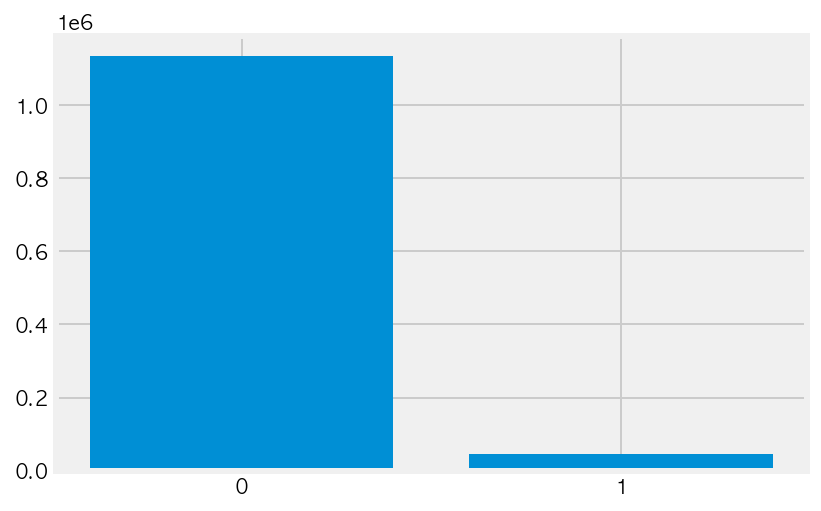

In [4]:
dang = data[data['당뇨여부']== 1].copy()
nodang = data[data['당뇨여부']== 0].copy()


plt.bar(np.arange(2),[len(nodang),len(dang)])
plt.xticks(np.arange(2),['0','1'])

print("비율 :",len(dang)/len(nodang))

In [5]:
from imblearn.under_sampling import RandomUnderSampler

def UnderSampling(ss):
    rus = RandomUnderSampler(sampling_strategy = ss)

    x_rus, y_rus = rus.fit_resample(X, Y)
    
    return x_rus, y_rus

In [6]:
X = data[['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', 'BMI']].copy()
Y = data[['당뇨여부']].copy()

In [7]:
print("원본 데이터 당뇨 수", pd.get_dummies(Y).sum())

x_rus, y_rus = UnderSampling(0.8)


print("랜덤 언더 샘플링(0.8) 후, 비당뇨 수(auto) ->",len(y_rus[y_rus['당뇨여부']==0]))
print("비율 :",len(y_rus[y_rus['당뇨여부']==1])/(len(y_rus[y_rus['당뇨여부']==0])))


원본 데이터 당뇨 수 당뇨여부   46579.00000
dtype: float64
랜덤 언더 샘플링(0.8) 후, 비당뇨 수(auto) -> 58223
비율 : 0.8000103052058465


In [8]:
def showbar(df_y): 
    dang = df_y[df_y['당뇨여부']== 1].copy()
    nodang = df_y[df_y['당뇨여부']== 0].copy()

    plt.bar(np.arange(2),[len(nodang),len(dang)])
    plt.xticks(np.arange(2),['0','1'])

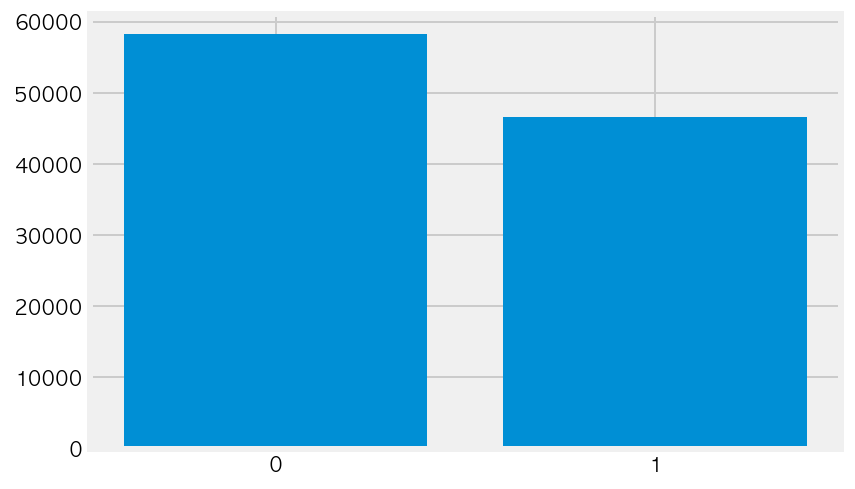

In [9]:
showbar(y_rus)

# Logistic Regression coefficient를 통한 Feature Importance 조사


## Ver1

: Randomstate 값 변화

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [11]:
def diff_randomstate(rs):
    if rs:
        save_x_train, save_x_test, save_y_train, save_y_test = train_test_split(x_rus, y_rus, random_state=rs, shuffle=True, stratify = y_rus, test_size=0.2)
        save_LR = LogisticRegression().fit(save_x_train, save_y_train)
    
    else:
        for r in range(51):
            x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, random_state=r, shuffle=True, stratify = y_rus)
            LR = LogisticRegression().fit(x_train, y_train)
            top_rate = 0

            print("RandomState :", r)
            print("TrainSet accuarcy : {:.5f}".format(LR.score(x_train, y_train)))
            print("TestSet accuarcy : {:.5f}".format(LR.score(x_test, y_test)))
            print("----------")

            if top_rate < LR.score(x_train, y_train) :
                top_rate = LR.score(x_train, y_train)
                save_LR = LR
                save_x_train = x_train
                save_x_test = x_test
                save_y_train = y_train
                save_y_test = y_test
        
    return save_LR,save_x_train, save_x_test, save_y_train, save_y_test

In [12]:

LR, x_train, x_test, y_train, y_test = diff_randomstate(42)

In [20]:
def plot_model(model):
    n_features = len(X.columns)
    feature_names = X.columns
    
    plt.figure(figsize = (10,8))
    coef = model.coef_.reshape(-1,)
    plt.barh(np.arange(n_features),coef, align="center")
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

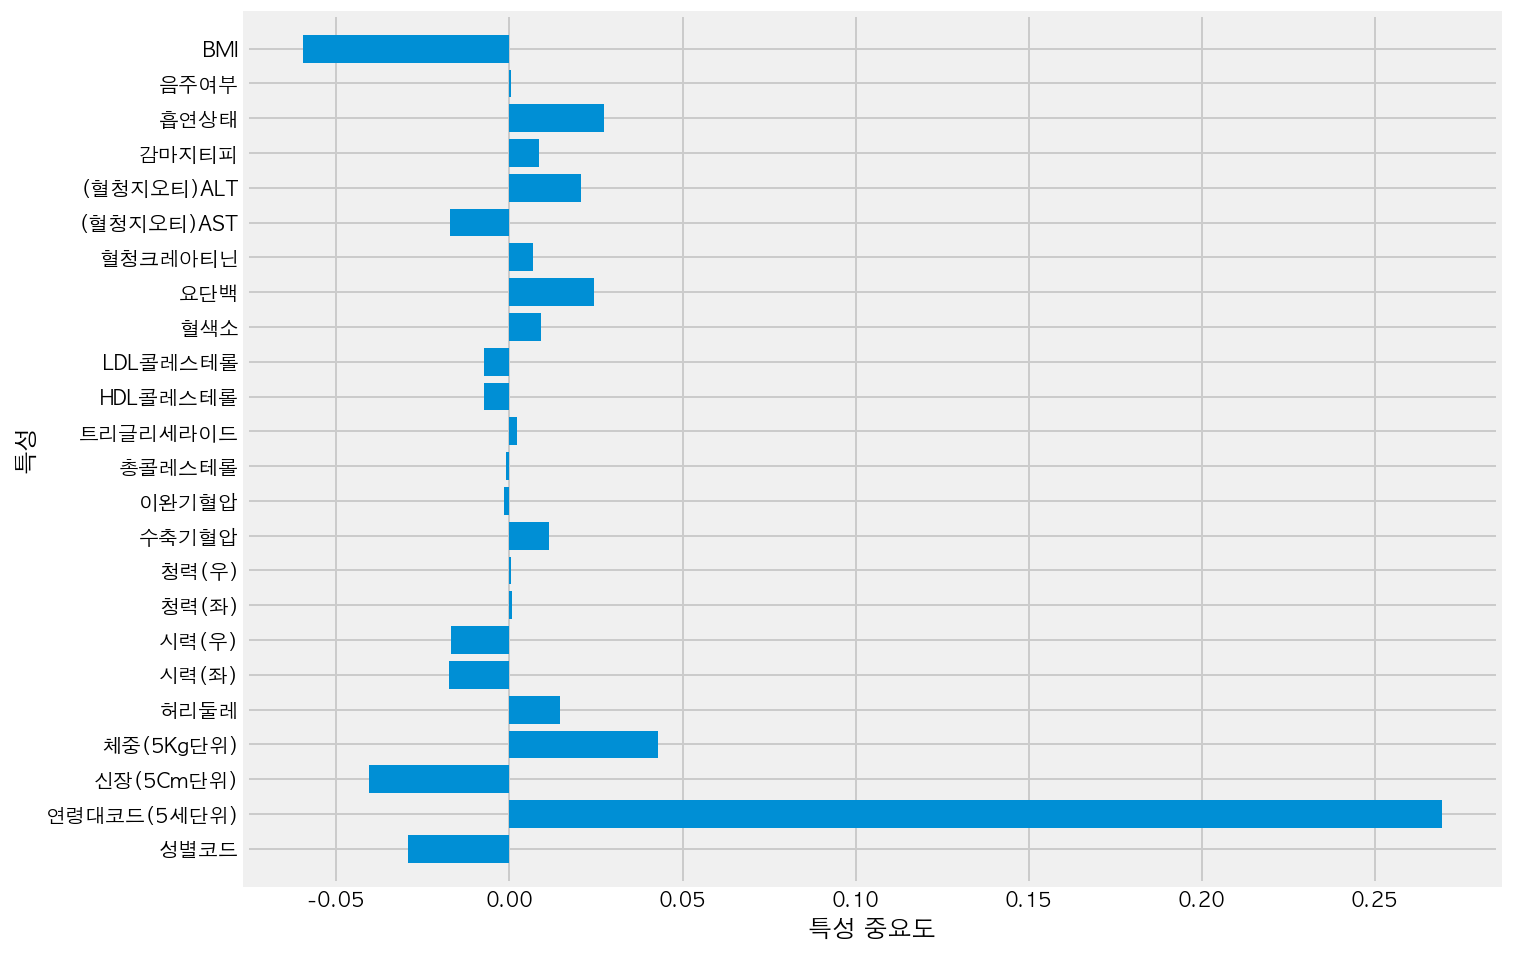

In [21]:
plot_model(LR)

## Ver.2
 : Logistic Regression 모델의 C, penalty 값을 다르게 주며 측정

In [22]:
from sklearn.metrics import accuracy_score, classification_report
# C값이 클수록 Decision boundary는 Train data에 맞춰진다 --> 오버 피팅의 가능성이 증가한다.
# C값이 작을수록 regularization이 크게 적용 -> 언더 피팅 발생 가능
C = [0.01, 0.1, 1, 100, 1000] 
penalty = ['l1','l2']

for c in C:
    for p in penalty:
        logreg = LogisticRegression(C=c,penalty=p,solver='liblinear',max_iter=1000)
        logreg.fit(x_train,y_train)
        y_pred = logreg.predict(x_test)
        acc_score = accuracy_score(y_test,y_pred)
        print("C: {}, penalty: {}, accuracy: {}".format(c,p,acc_score))
        print(classification_report(y_test,y_pred))

C: 0.01, penalty: l1, accuracy: 0.7012070034826583
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.73     11645
         1.0       0.67      0.65      0.66      9316

    accuracy                           0.70     20961
   macro avg       0.70      0.70      0.70     20961
weighted avg       0.70      0.70      0.70     20961

C: 0.01, penalty: l2, accuracy: 0.7021611564333763
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74     11645
         1.0       0.67      0.65      0.66      9316

    accuracy                           0.70     20961
   macro avg       0.70      0.70      0.70     20961
weighted avg       0.70      0.70      0.70     20961

C: 0.1, penalty: l1, accuracy: 0.7025428176136634
              precision    recall  f1-score   support

         0.0       0.73      0.75      0.74     11645
         1.0       0.67      0.65      0.66      9316

    accuracy                  

: 단순히 C, penalty 값을 변경하는 것으로는 모델의 성능이 달라지지 않는다.

모델에 들어가는 속성부터 다시 생각해보자.

In [23]:
# 가장 높은 값인 C = 1, penalty = l2으로 진행

from sklearn.metrics import roc_auc_score


logreg = LogisticRegression(penalty='l2',C=1,solver='liblinear',max_iter=2000)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
auc = roc_auc_score(y_test, logreg.predict_proba(x_test)[:, 1])

print("acc_score: ",acc_score, "AUC: ",auc)

acc_score:  0.7023042793759839 AUC:  0.7742585829058848


In [24]:
keywords = pd.DataFrame(logreg.coef_, columns=['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', 'BMI'])
keywords.T.sort_values(by=0,ascending=False)

,0
요단백,0.28060
연령대코드(5세단위),0.26076
흡연상태,0.09521
체중(5Kg단위),0.03745
음주여부,0.03122
허리둘레,0.02324
(혈청지오티)ALT,0.02101
혈색소,0.01370
수축기혈압,0.01176
감마지티피,0.00733


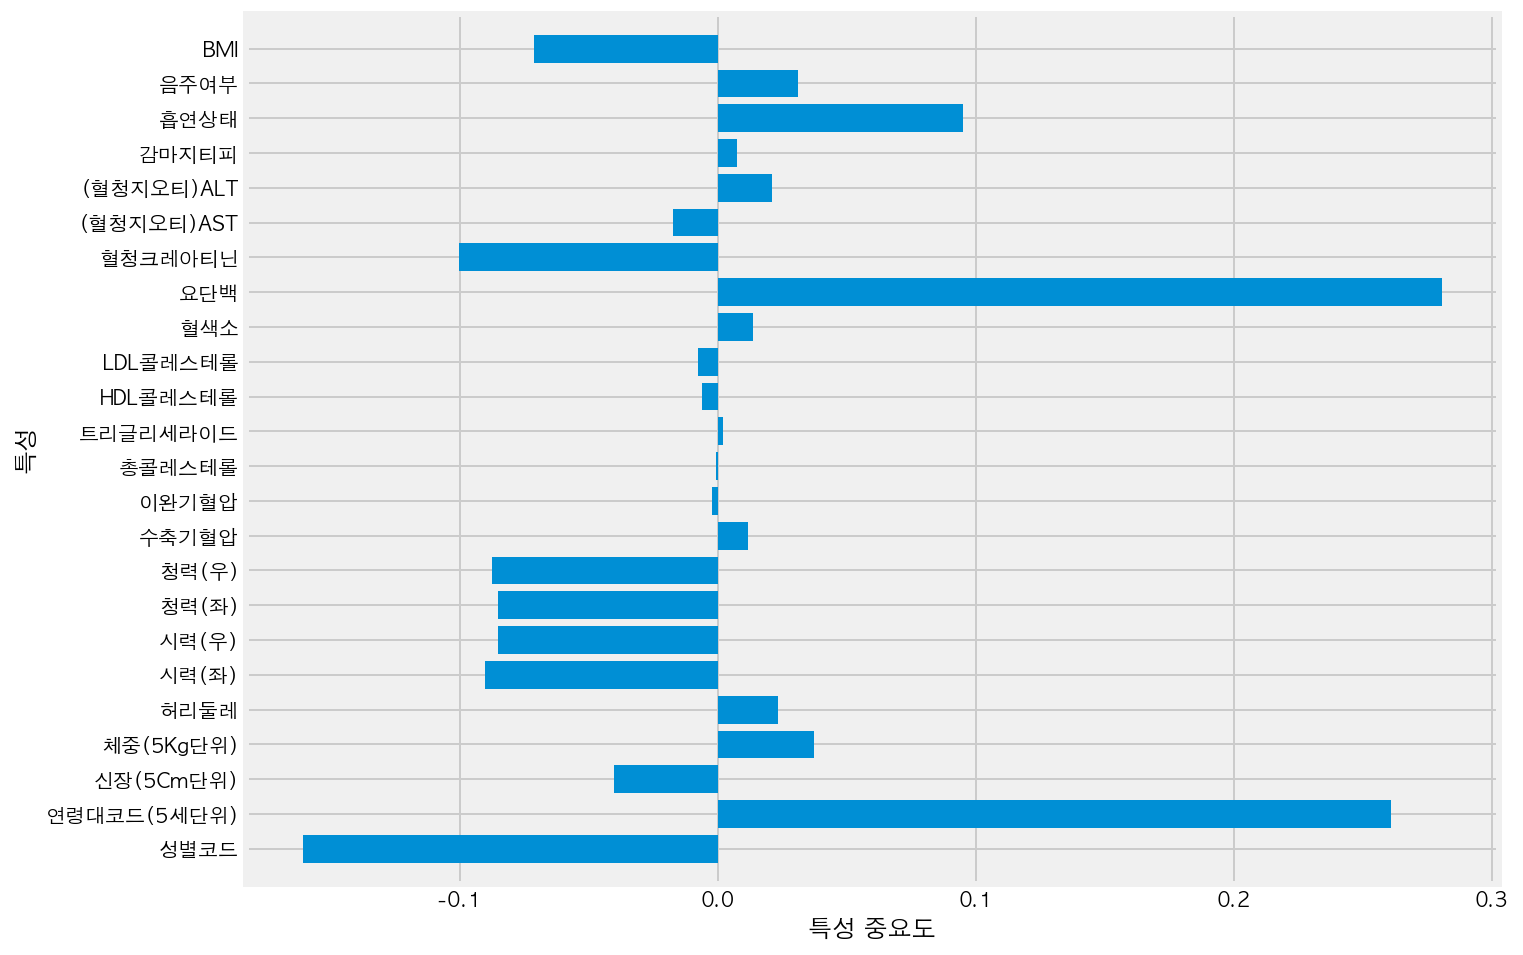

In [25]:
plot_model(logreg)

acc_score:  0.6974542956375711 AUC:  0.7712597981105176
의 수치를 보이지만 feature coef를 보면 제대로 수행되지 않음을 느낄 수 있다.


## Ver.3
 : 스케일링 진행

# 멈춰!
 : 우선 속성 간 다중공선성을 고려하여 높은 속성들을 제거하자.
  -> 독립 변수 는 다른 독립 변수와 상관 관계가 있으면 모델에 악영향을 끼친다.
 

In [26]:
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [27]:
data.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '당뇨여부', 'BMI'],
      dtype='object')

<AxesSubplot:>

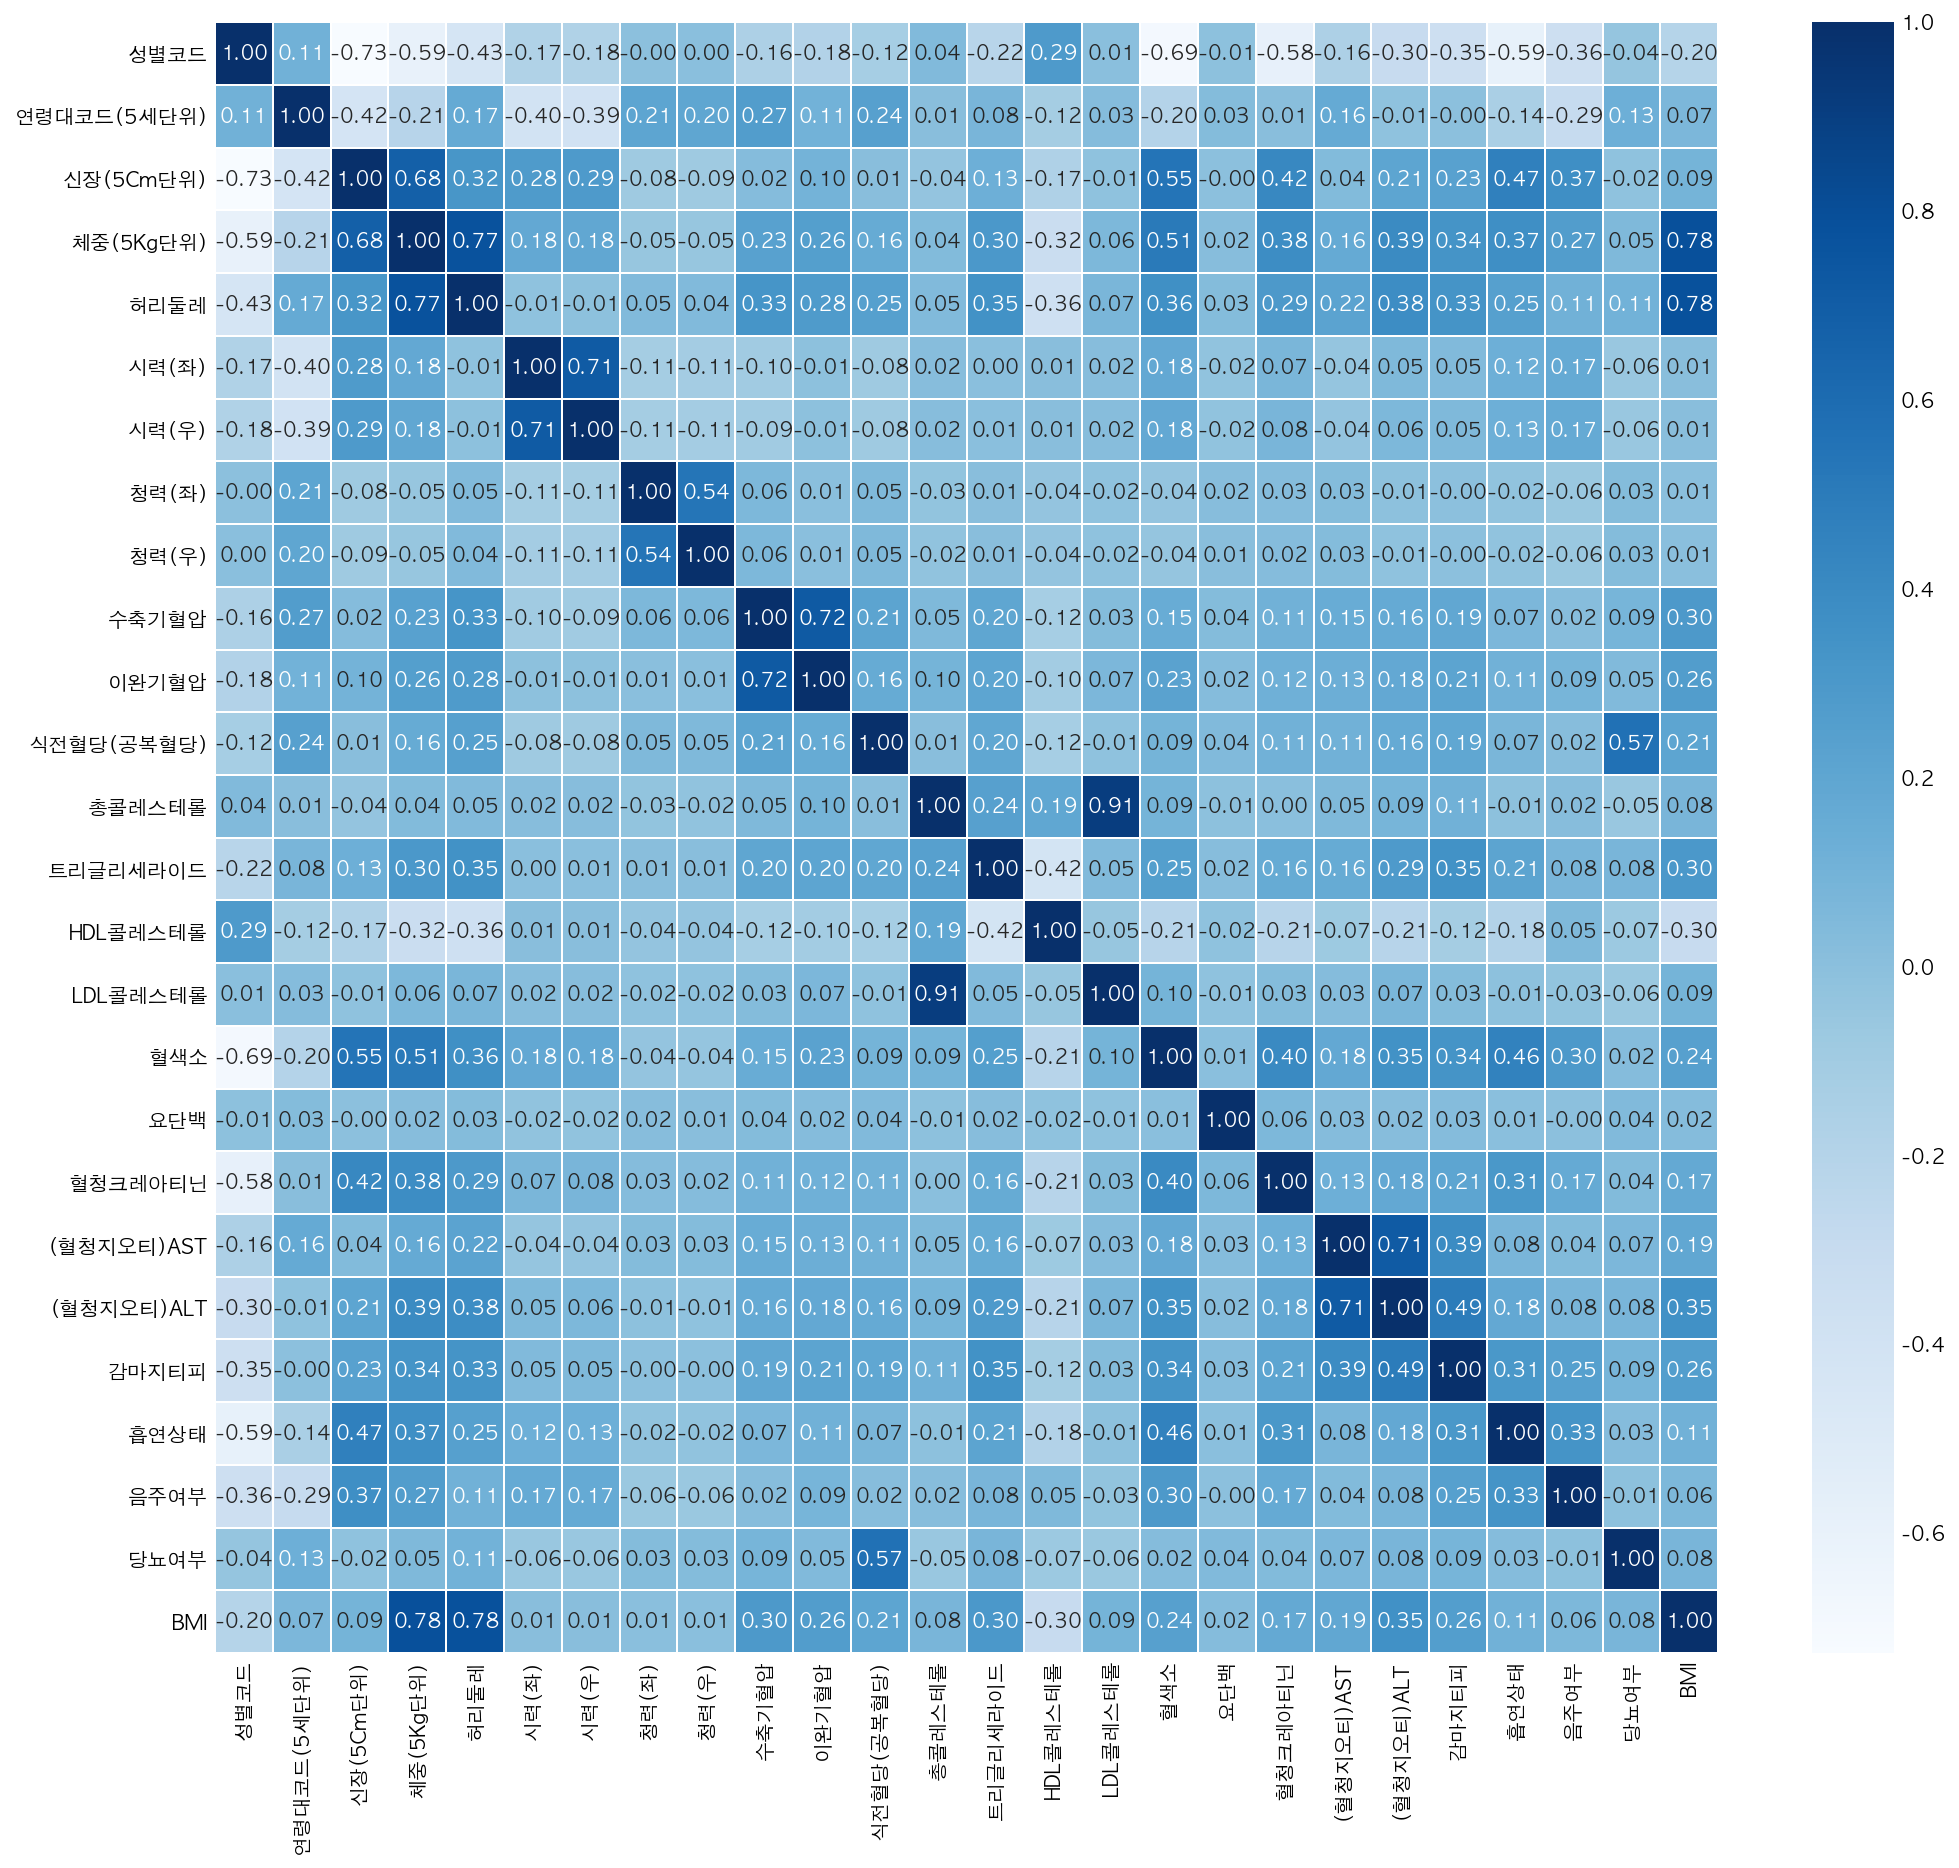

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [29]:
from statsmodels.formula.api import ols
mydata = data.copy()
mydata.rename(columns = {"연령대코드(5세단위)": "연령대코드", "(혈청지오티)AST": "AST","(혈청지오티)ALT" : "ALT", "신장(5Cm단위)":"신장","체중(5Kg단위)": "체중"}, inplace =True)
mydata.columns

model = ols('당뇨여부 ~ 성별코드+연령대코드+신장+체중+허리둘레+수축기혈압+이완기혈압+총콜레스테롤+트리글리세라이드+HDL콜레스테롤+LDL콜레스테롤+혈색소+요단백+혈청크레아티닌+AST+ALT+감마지티피+흡연상태+음주여부+BMI',mydata)

In [30]:
res = model.fit()

In [31]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   당뇨여부   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     2309.
Date:                Sat, 22 May 2021   Prob (F-statistic):               0.00
Time:                        00:32:04   Log-Likelihood:             2.7910e+05
No. Observations:             1180120   AIC:                        -5.582e+05
Df Residuals:                 1180099   BIC:                        -5.579e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3423      0.019    -17.758      0.000      -0.380      -0.304
성별코드           0.0018      0.001      2.517      0.012       0.000       0.003
연령대코드          0.0075   8.52e-05     88.036      0.000       0.007       0.008
신장             0.0012      0.000     10.215      0.000       0.001       0.001
체중            -0.0019      0.000    -13.383      0.000      -0.002      -0.002
허리둘레           0.0010   3.81e-05     27.341      0.000       0.001       0.001
수축기혈압          0.0006   1.96e-05     29.931      0.000       0.001       0.001
이완기혈압         -0.0005   2.78e-05    -17.118      0.000      -0.001      -0.000
총콜레스테롤        -0.0002   6.32e-05     -2.680      0.007      -0.000   -4.55e-05
트리글리세라이드    8.676e-05   1.28e-05      6.790      0.000    6.17e-05       0.000
HDL콜레스테롤   -6.228e-05   6.46e-05     -0.964      0.335      -0.000    6.43e-05
LDL콜레스테롤      -0.0003   6.32e-05     -4.204      0.000      -0.000      -0.000
혈색소            0.0002      0.000      1.054      0.292      -0.000       0.001
요단백            0.0179      0.000     39.399      0.000       0.017       0.019
혈청크레아티닌        0.0065      0.001      5.946      0.000       0.004       0.009
AST           -0.0005   2.96e-05    -16.604      0.000      -0.001      -0.000
ALT            0.0007   2.13e-05     34.151      0.000       0.001       0.001
감마지티피          0.0003   8.73e-06     38.627      0.000       0.000       0.000
흡연상태           0.0013      0.000      4.558      0.000       0.001       0.002
음주여부           0.0013      0.000      3.136      0.002       0.000       0.002
BMI            0.0050      0.000     13.313      0.000       0.004       0.006
==============================================================================
Omnibus:                  1034239.780   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21392221.622
Skew:                           4.461   Prob(JB):                         0.00
Kurtosis:                      21.854   Cond. No.                     3.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 : 주석[2] 를 보면 전체 속성끼리 상관관계를 분석했을 때, 다중공선성이 나타남을 알 수 있다.

In [32]:
model.exog_names

['Intercept',
 '성별코드',
 '연령대코드',
 '신장',
 '체중',
 '허리둘레',
 '수축기혈압',
 '이완기혈압',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 'AST',
 'ALT',
 '감마지티피',
 '흡연상태',
 '음주여부',
 'BMI']

In [33]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.


,컬럼,VIF
0,성별코드,4.26293
1,연령대코드,1.88863
2,신장,37.30125
3,체중,92.74664
4,허리둘레,3.97127
5,수축기혈압,2.33013
6,이완기혈압,2.18791
7,총콜레스테롤,168.87849
8,트리글리세라이드,23.78216
9,HDL콜레스테롤,27.51155


일반적으로 VIF(Variance_inflation_factor)의 수치가 10 이상이면 다중공선성이 생기는 것으로 판단 , 제거한다. 높은 수치부터 제거해보자.

In [34]:
model = ols('당뇨여부 ~ 성별코드+연령대코드+허리둘레+수축기혈압+이완기혈압+트리글리세라이드+HDL콜레스테롤+LDL콜레스테롤+혈색소+요단백+혈청크레아티닌+AST+ALT+감마지티피+흡연상태+음주여부+BMI',mydata)
res = model.fit()
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,성별코드,3.31089
1,연령대코드,1.43802
2,허리둘레,3.55328
3,수축기혈압,2.32971
4,이완기혈압,2.18705
5,트리글리세라이드,1.43144
6,HDL콜레스테롤,1.40850
7,LDL콜레스테롤,1.03547
8,혈색소,2.15789
9,요단백,1.00726


- 신장,체중 제거 - > BMI의 VIF가 10 이하로 떨어짐
- 총콜레스테롤 제거 -> 연관된 3개의 VIF가 10 이하로 떨어짐

-> 신장, 체중, 총 콜레스트테롤을 제거하면 우리가 가진 속성들은 다중공선성에 있어서 문제를 갖지 않음을 알 수 있다.

### PBL1에서 도출한 주/부 속성들로만 VIF를 측정해보자.


In [35]:
# PBL 1에서 진행한 
model = ols('당뇨여부 ~ 허리둘레+연령대코드+수축기혈압+이완기혈압+AST+ALT+감마지티피+BMI',mydata)
res = model.fit()

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model.exog, i)} 
             for i, column in enumerate(model.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,허리둘레,2.88711
1,연령대코드,1.21239
2,수축기혈압,2.31786
3,이완기혈압,2.14528
4,AST,2.23643
5,ALT,2.63526
6,감마지티피,1.40063
7,BMI,2.66897


: 역시 VIF 수치 상, 다중공선성은 문제가 되지 않는다.

<AxesSubplot:>

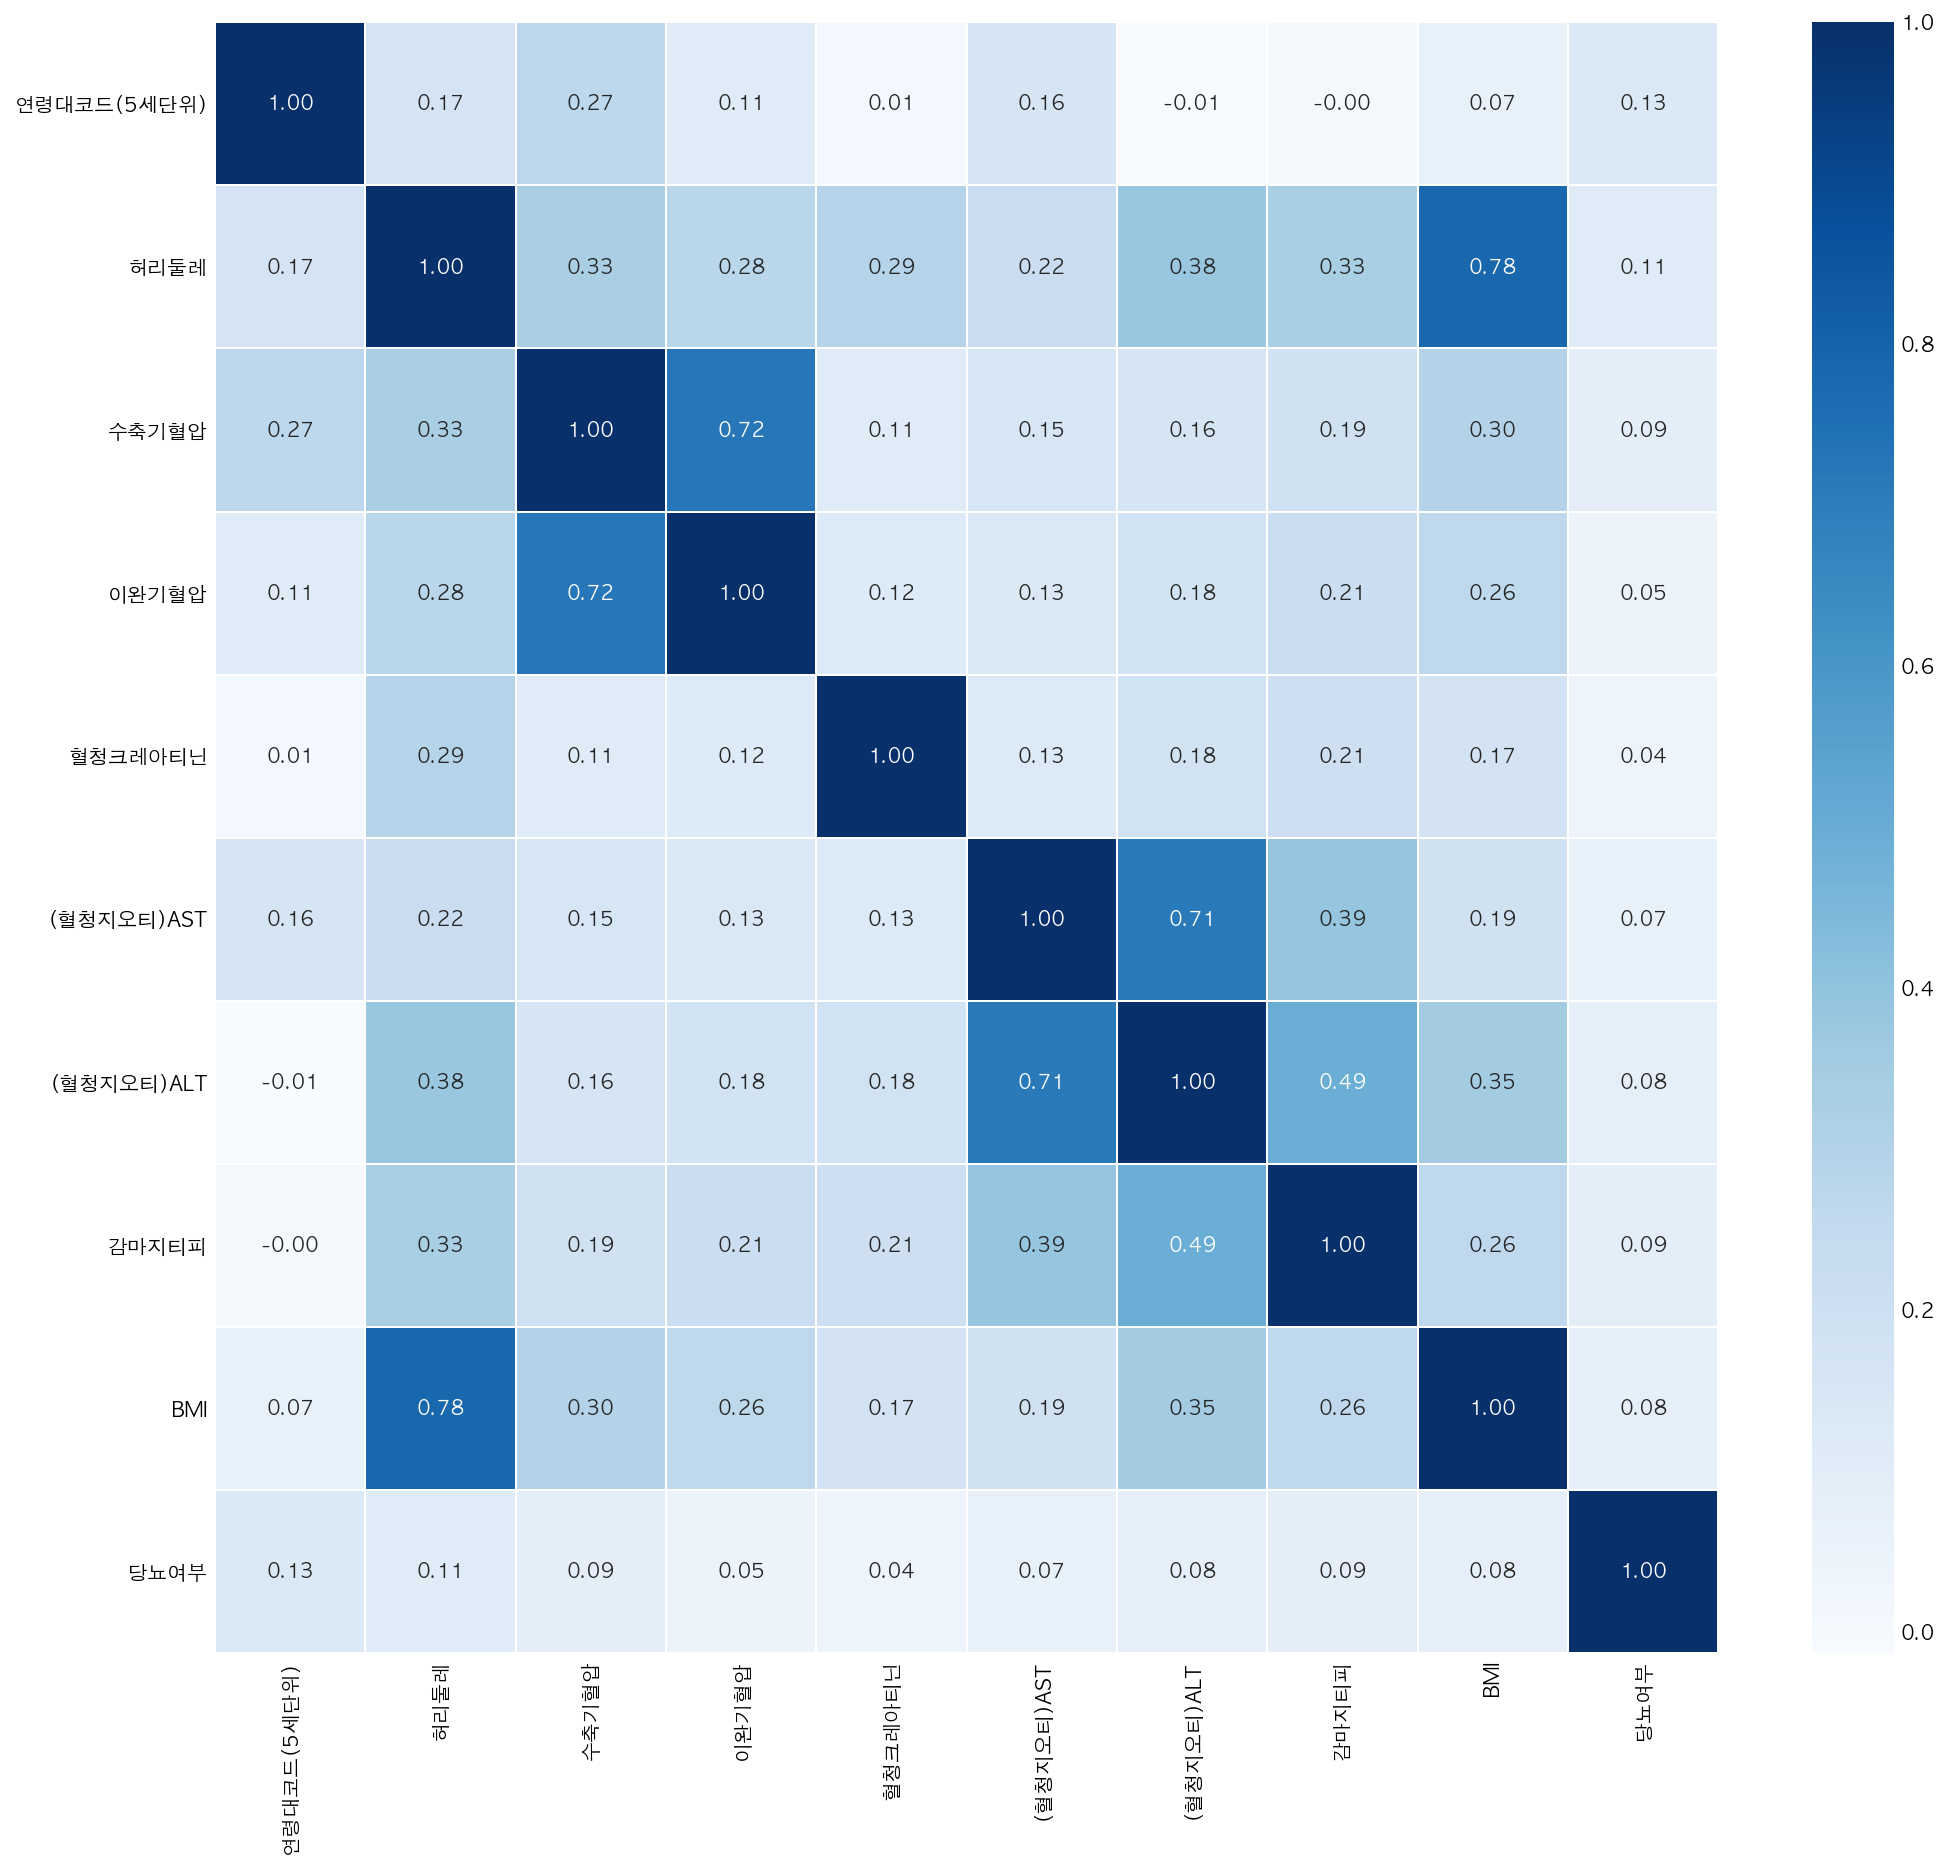

In [36]:
pbl1_data=data[['연령대코드(5세단위)','허리둘레', '수축기혈압', '이완기혈압', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', 'BMI','당뇨여부']].copy()

plt.figure(figsize=(15,15))
sns.heatmap(data = pbl1_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

다중공선성은 해결되었지만, 허리둘레와 BMI가 비교적 높은 상관관계를 갖기 때문에 둘 중 하나만 쓰도록 하자.

## Ver.4 
 : 스케일링 한 데이터로 C, penalty에 변화주면서 측정

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, random_state=42, shuffle=True, stratify = y_rus, test_size=0.2)

In [41]:
S_scaler = StandardScaler()

In [42]:
s_x_train = S_scaler.fit_transform(x_train)
s_x_test= S_scaler.transform(x_test)

In [43]:
C = [0.01, 0.1, 1, 100,1000]
penalty = ['l1','l2']
for c in C:
    for p in penalty:
        logreg = LogisticRegression(C=c,penalty=p,solver='liblinear',max_iter=2000)
        logreg.fit(s_x_train,y_train)
        y_pred = logreg.predict(s_x_test)
        acc_score = accuracy_score(y_test,y_pred)
        print("C: {}, penalty: {}, accuracy: {}".format(c,p,acc_score))
        print(classification_report(y_test,y_pred))

C: 0.01, penalty: l1, accuracy: 0.7019703258432327
              precision    recall  f1-score   support

         0.0       0.73      0.74      0.73     11645
         1.0       0.67      0.65      0.66      9316

    accuracy                           0.70     20961
   macro avg       0.70      0.70      0.70     20961
weighted avg       0.70      0.70      0.70     20961

C: 0.01, penalty: l2, accuracy: 0.7011592958351224
              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73     11645
         1.0       0.67      0.65      0.66      9316

    accuracy                           0.70     20961
   macro avg       0.70      0.70      0.70     20961
weighted avg       0.70      0.70      0.70     20961

C: 0.1, penalty: l1, accuracy: 0.7014455417203378
              precision    recall  f1-score   support

         0.0       0.72      0.75      0.74     11645
         1.0       0.67      0.65      0.66      9316

    accuracy                  

Standard 스케일링 이후 C,P 값의 변화를 주어도 Accuracy는 0.7에 수렴한다.

In [44]:
# C: 1, penalty: l1, accuracy: 0.7045914278080989

logreg = LogisticRegression(penalty='l1',C=1,solver='liblinear',max_iter=2000)
logreg.fit(s_x_train,y_train)
y_pred = logreg.predict(s_x_test)
acc_score = accuracy_score(y_test,y_pred)
auc = roc_auc_score(y_test, logreg.predict_proba(s_x_test)[:, 1])

print("acc_score: ",acc_score, "AUC: ",auc)

acc_score:  0.7012070034826583 AUC:  0.7750526110473336


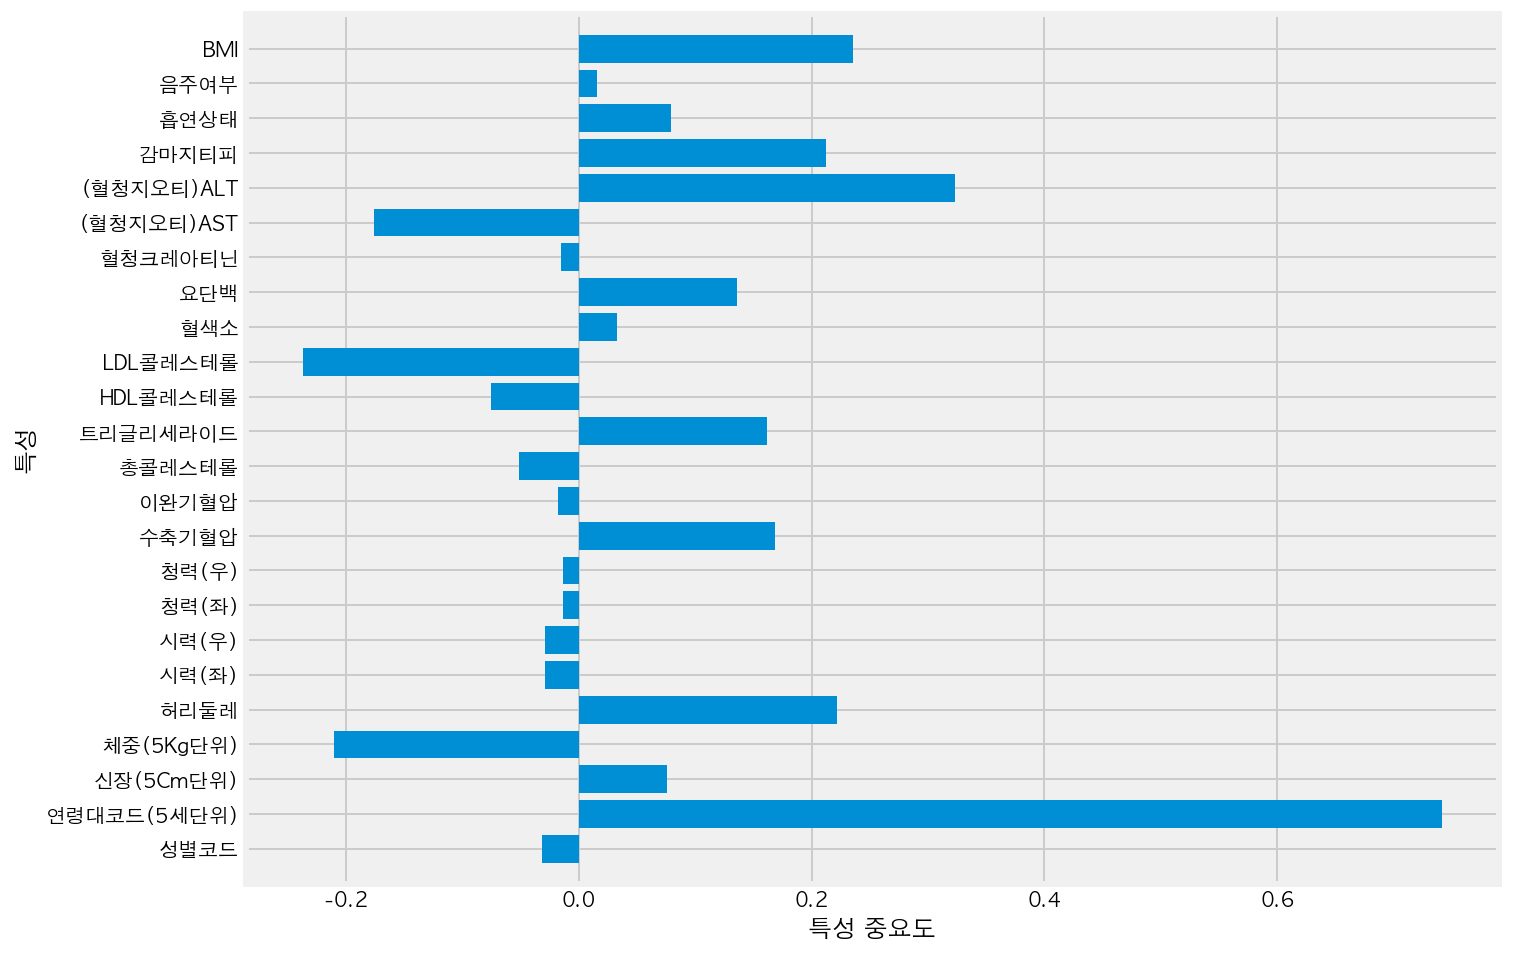

In [45]:
plot_model(logreg)

 : 스케일링 이후, 특성 중요도가 어느정도 우리가 예상한 비율과 일치한다.
 - 자료를 찾아보니 특성 중요도의 절대값의 크기가 타겟 변수에 끼치는 영향이라고 하고, 음의 중요도를 가진 속성은 타겟 변수에 미치는 영향이 반비례 관계라고 하는 것 같다.
 
 ### 스케일링 이후 특성 중요도를 찍어보면
  - 연령대코드
  - 허리둘레
  - 수축기혈압
  - ALT
  - 감마지티피
  - BMI
  
  - (-) 체중
  - (-) LDL 콜레스테롤
  - (-)AST
  
 의 수치가 높은 것을 확인할 수 있다.

In [46]:
## Feature를 PBL1에서 정한 상위 속성으로만 모델링 진행해보기

X = x_rus[['허리둘레','연령대코드(5세단위)','감마지티피','수축기혈압','이완기혈압','(혈청지오티)ALT','(혈청지오티)AST','BMI']].copy()
Y = y_rus[['당뇨여부']].copy()

            
    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, random_state=42,test_size=0.2, shuffle=True)
   
#     ## Data Scaling
    
    ## 1. StandardScaler

S_X_train = S_scaler.fit_transform(X_train)
S_X_test= S_scaler.transform(X_test)
    
    ## 2. RobustScaler
    
#     R_X_train = R_scaler.fit_transform(X_train)
#     R_X_test= R_scaler.transform(X_test)
    
LR_model = LogisticRegression(penalty='l1',C=1,solver='liblinear',max_iter=2000)
LR_model.fit(S_X_train,Y_train)
Y_pred = LR_model.predict(S_X_test)
acc_score = accuracy_score(Y_test,Y_pred)
auc = roc_auc_score(Y_test, LR_model.predict_proba(S_X_test)[:, 1])


print("acc_score: ",acc_score, "AUC: ",auc)

acc_score:  0.6861790945088497 AUC:  0.7581484948769791


[[ 0.30136543  0.78143206  0.27325307  0.17741159 -0.02501512  0.33810396
  -0.18535736  0.06563964]]


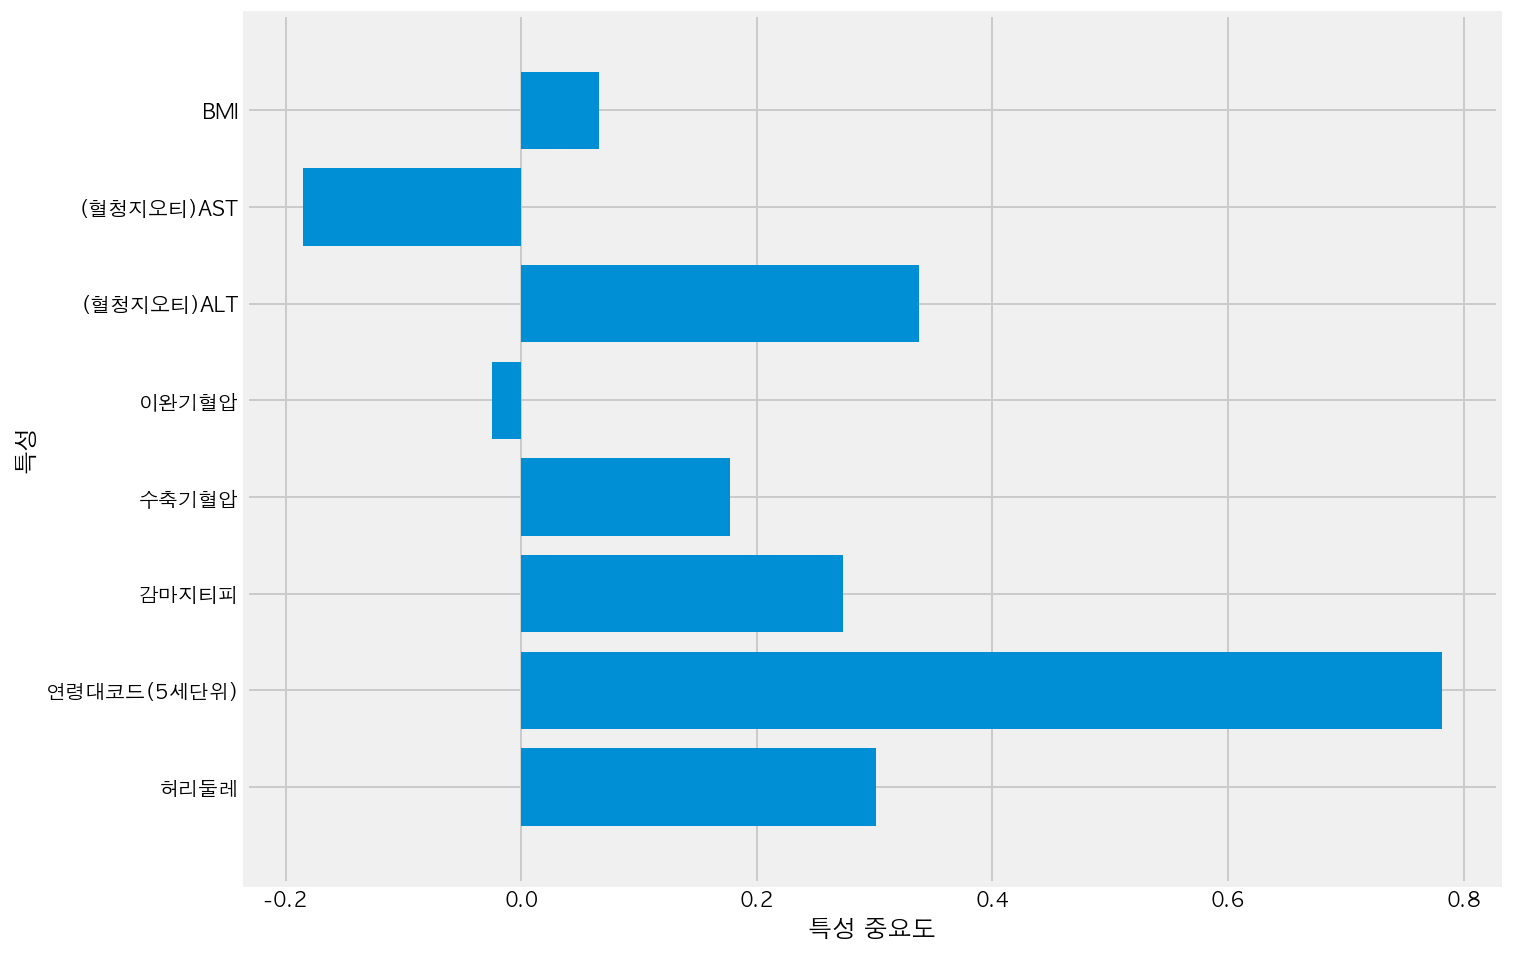

In [47]:
## coefficients 값 확인
## '허리둘레','연령대코드(5세단위)','감마지티피','수축기혈압','이완기혈압','(혈청지오티)ALT','(혈청지오티)AST','BMI'
print(LR_model.coef_)
plot_model(LR_model)

: 상위 값을 가지는 5가지 속성을 모델에 대입해보자
 - 허리둘레, 연령대코드(5세단위), 감마지티피, 수축기혈압, (혈청지오티)ALT

In [59]:
main_X = x_rus[['허리둘레','연령대코드(5세단위)','감마지티피','수축기혈압','(혈청지오티)ALT']].copy()
main_Y = y_rus[['당뇨여부']].copy()
S_scaler = StandardScaler()

X_train, X_test, Y_train, Y_test = train_test_split(main_X, main_Y, stratify=main_Y, random_state=42,test_size=0.2, shuffle=True)

S_X_train = S_scaler.fit_transform(X_train)
S_X_test= S_scaler.transform(X_test)

LR = LogisticRegression(penalty='l1',C=1,solver='liblinear',max_iter=2000)
LR.fit(S_X_train,Y_train)
Y_pred = LR.predict(S_X_test)
acc_score = accuracy_score(Y_test,Y_pred)
auc = roc_auc_score(Y_test, LR.predict_proba(S_X_test)[:, 1])

print("acc_score: ",acc_score, "AUC: ",auc)

acc_score:  0.6868947092218882 AUC:  0.7564406153782621


In [65]:
## '허리둘레','연령대코드(5세단위)','감마지티피','수축기혈압',(혈청지오티)ALT','(혈청지오티)AST','BMI'
Dong =  np.array([100.0, 14, 42.0, 140.0,20])
Hyuck = np.array([80.0, 12, 35.0, 134.0,40])
Hee =   np.array([91.0, 11, 40.0, 130.0,30])
Sue =   np.array([74.0, 10, 20.0, 130.0,40])
Gu =    np.array([72.0, 7, 24.0, 120.0,30])

sample_people = np.array([Dong, Hyuck, Hee, Sue, Gu])

In [66]:
sample_people = S_scaler.transform(sample_people)

In [67]:
print(LR.predict(sample_people))


[1. 1. 1. 0. 0.]


In [130]:
print(LR.predict_proba(sample_people))

[[0.22677063 0.77322937]
 [0.49025481 0.50974519]
 [0.48246257 0.51753743]
 [0.71307381 0.28692619]
 [0.88198605 0.11801395]]


## TP FP FN FP 확인

In [69]:
is_correct = Y_pred == Y_test.values
print(is_correct)

[[False  True False ... False False False]
 [False  True False ... False False False]
 [ True False  True ...  True  True  True]
 ...
 [False  True False ... False False False]
 [False  True False ... False False False]
 [False  True False ... False False False]]


In [70]:
np.mean(is_correct)

0.5082984802463835

In [71]:
print(len(Y_test))
print(sum(Y_test.values))

np.sum(Y_pred)

20961
[9316.]


8915.0

In [72]:
from sklearn import metrics


In [73]:
metrics.confusion_matrix(Y_test,Y_pred)  #[[TN, FP][FN, TP]]

array([[8564, 3081],
       [3482, 5834]])

In [74]:
# P = sum(y_test08)
# TP = sum((y_test08==1) & (y_pred08 ==1))
# TPR = TP/P

# FN = sum((y_test08==1) & (y_pred08 == 0))
# FNR = FN / P

# N =sum(y_pred08 == 0)

# print(P)
# print(TP)
# print(TPR)
# print(FN)
# print(FNR)

(tn, fp, fn, tp) = metrics.confusion_matrix(Y_test, Y_pred).ravel()

print(tn,fp,fn,tp)


8564 3081 3482 5834


## Fall-out , Precision, Recall, F1_score

In [75]:
## Fall-out 
fpr = fp / (tn+fp)
print("Fallout: ", fpr)


## Precision

precision = tp / (tp+fp)
print("Precision: ",precision)

## Recall

recall = tp / (tp+fn)
print("Recall: ",recall)

## F1 score

f_score = (precision * recall * 2) / (precision + recall)
print("F score: ",f_score)



Fallout:  0.26457707170459427
Precision:  0.6544026920919798
Recall:  0.6262344353799915
F score:  0.6400087762602161


In [76]:
## ROC curve

    
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = metrics.roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], "k--", label='Random')
  
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
  



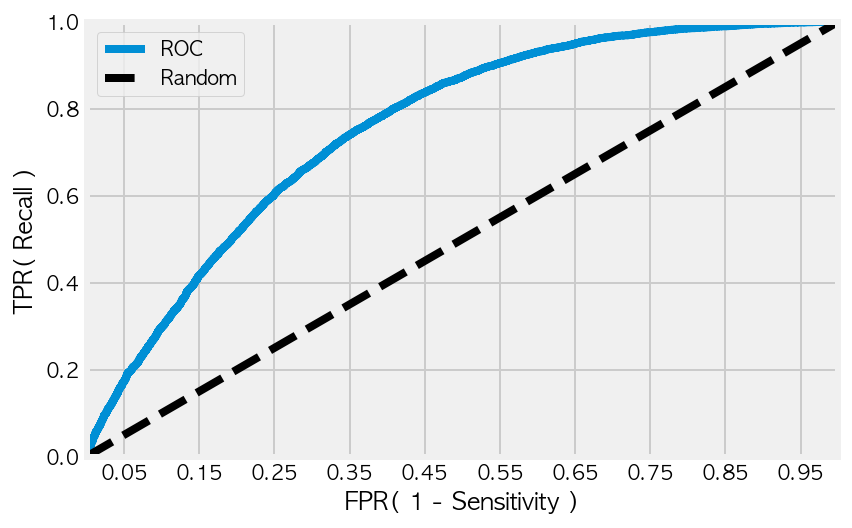

In [77]:
# lr_proba = lr08.predict_proba(r_x_test08)[:, 1]

# roc_curve_plot(y_test, lr_proba)

roc_curve_plot(Y_test, LR_model.predict_proba(S_X_test)[:, 1]) 


## AUC 

In [78]:

roc_auc = metrics.roc_auc_score(Y_test, LR_model.predict_proba(S_X_test)[:, 1])

print('ROC/AUC VAL: {0:.4f}'.format(roc_auc))

ROC/AUC VAL: 0.7564


In [79]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72     11645
         1.0       0.65      0.63      0.64      9316

    accuracy                           0.69     20961
   macro avg       0.68      0.68      0.68     20961
weighted avg       0.69      0.69      0.69     20961



(0.0, 1.0)

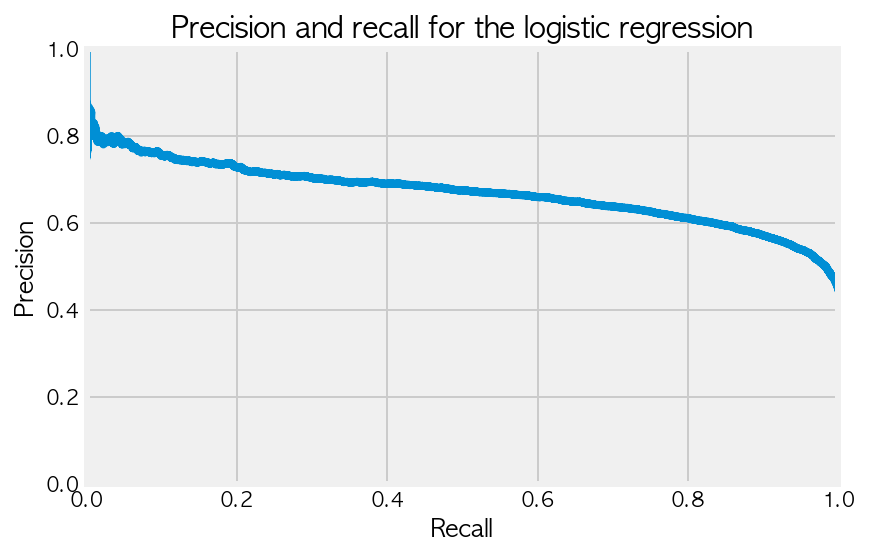

In [80]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(Y_test, LR_model.predict_proba(S_X_test)[:, 1])

plt.plot(recall, precision, '-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression')
plt.xlim([0, 1])
plt.ylim([0, 1])

## StandardScaler, Undersampling = 0.8, PBL1의 속성 전체 사용, C값 변경

In [92]:
def LogReg(X,y):
    lr001 = LogisticRegression(C=0.01,solver='liblinear',max_iter=2000)
    lr001.fit(S_X_train,Y_train)
    lr01 = LogisticRegression(C=0.1,solver='liblinear',max_iter=2000)
    lr01.fit(S_X_train,Y_train)
    lr1 = LogisticRegression(C=1,solver='liblinear',max_iter=2000)
    lr1.fit(S_X_train,Y_train)
    lr100 = LogisticRegression(C=100,solver='liblinear',max_iter=2000)
    lr100.fit(S_X_train,Y_train)
    lr1000 = LogisticRegression(C=1000,solver='liblinear',max_iter=2000)
    lr1000.fit(S_X_train,Y_train)

    return lr001, lr01, lr1, lr100, lr1000

In [119]:
def score(models):
    score001 = models[0].score(S_X_test, Y_test)
    score01 = models[1].score(S_X_test, Y_test)
    score1 = models[2].score(S_X_test, Y_test)
    score100 = models[3].score(S_X_test, Y_test)
    score1000 = models[4].score(S_X_test, Y_test)    
    
    return score001, score01, score1, score100, score1000


In [120]:
def show_coef(models):
    plt.figure(figsize=(7,5))
    plt.plot(models[0].coef_.T, '*',label="C=0.01")
    plt.plot(models[1].coef_.T, 'v',label="C=0.1")
    plt.plot(models[2].coef_.T, '^',label="C=1")
    plt.plot(models[3].coef_.T, 'x',label="C=100")
    plt.plot(models[4].coef_.T, '+',label="C=1000")

    plt.xticks(range(len(main_X.columns)),main_X.columns,rotation=90)
    xlims = plt.xlim()
    plt.hlines(0,xlims[0],xlims[1])
    plt.legend()

In [121]:
models = LogReg(S_X_train,Y_train)

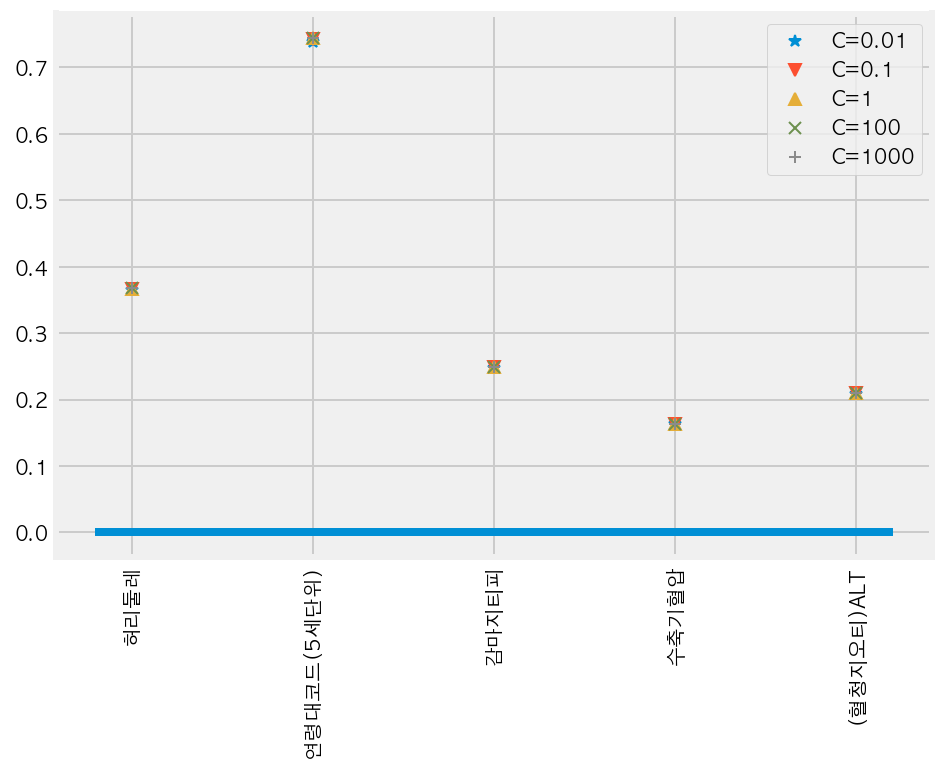

In [122]:
show_coef(models)

In [123]:
scores = score(models)
l = [0.01, 0.1, 1, 100, 1000]
for s in range(len(scores)):
    print("C:",l[s],"\t Accuarcy: " ,scores[s])
    

C: 0.01 	 Accuarcy:  0.6868470015743524
C: 0.1 	 Accuarcy:  0.6867515862792806
C: 1 	 Accuarcy:  0.6867515862792806
C: 100 	 Accuarcy:  0.6867515862792806
C: 1000 	 Accuarcy:  0.6867515862792806


In [128]:
def confusion_matrix(models, X_test,y_test):
    m = "C"
    s = [0.01, 0.1, 1, 100, 1000]
    for i, model in enumerate(models):
        y_pred = model.predict(X_test)
        print(m +" = ", s[i])
        print(metrics.confusion_matrix(y_test, y_pred),"\n")

In [129]:
confusion_matrix(models,S_X_test,Y_test)

C =  0.01
[[8562 3083]
 [3481 5835]] 

C =  0.1
[[8563 3082]
 [3484 5832]] 

C =  1
[[8564 3081]
 [3485 5831]] 

C =  100
[[8564 3081]
 [3485 5831]] 

C =  1000
[[8564 3081]
 [3485 5831]] 



: C값의 변화를 주어도 값들의 차이가 거의 없다.


최종 결과
 - Undersampling = 0.8
 - 속성: 허리둘레, 연령대코드(5세단위), 감마지티피, 수축기혈압, (혈청지오티)ALT
 - Accuracy: 0.6868947092218882 
 - AUC:  0.7564406153782621

In [132]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72     11645
         1.0       0.65      0.63      0.64      9316

    accuracy                           0.69     20961
   macro avg       0.68      0.68      0.68     20961
weighted avg       0.69      0.69      0.69     20961

